<a href="https://colab.research.google.com/github/Lipinor/deep_learning_cbpf/blob/master/tarefa_4_kfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q pyyaml h5py

In [ ]:
import numpy as np
import pandas as pd
import os
import PIL
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

from sklearn.model_selection import KFold, StratifiedKFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unpacking the images:

In [ ]:
!pip install unrar
!unrar x "/content/drive/My Drive/Deep_Learning/data/tarefa_4/data_folder.rar" 


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/Deep_Learning/data/tarefa_4/data_folder.rar


Would you like to replace the existing file data_folder/10002005746_7f1502879b.jpg
 26694 bytes, modified on 2018-07-30 16:40
with a new one
 26694 bytes, modified on 2018-07-30 16:40

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit E

All OK


In [ ]:
data_file_path = '/content/drive/My Drive/Deep_Learning/data/tarefa_4/dataset_images_minitest.csv'
train_data = pd.read_csv(data_file_path,sep='\t')

train_data = train_data.sample(frac=1).reset_index(drop=True)

train_data.head()


,filename,category
0,15022683371_d52253402c.jpg,picnic
1,4698502107_e7a0f5ab2d.jpg,meeting
2,7345276472_15ea3250e9.jpg,graduation
3,2843267649_258bc46782.jpg,meeting
4,2654253485_b3c74c788a.jpg,picnic


First, we are going to prepare our data. We need to ensure that the train and validation sets contain an equal distribution of the three image classes. We will split the dataframe into three, each containing images of one of the classes.

In [ ]:
Y = train_data[['category']]

kf = KFold(n_splits = 10)
                         
skf = StratifiedKFold(n_splits = 10, random_state = 7, shuffle = True)

n_samples = len(Y)

Create an instance of the ImageDataGenerator class:

In [ ]:
image_dir = "/content/data_folder"

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

Auxiliary function for getting model name in each of the k iterations:

In [ ]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

Getting the folds and creating the data generators:


In [ ]:
#@title Função para os plots (la_plots(history))
def la_plots(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    #Epochs
    epochs = range(len(val_loss))

    # Plotting loss
    
    COLOR = 'white'
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    

    fig1 = plt.figure(figsize=(8,5))
    gs1 = fig1.add_gridspec(1, 1)
    ax1 = fig1.add_subplot(gs1[0, 0])

    ax1.plot(epochs, loss, 'r-o', label='Training')
    ax1.plot(epochs, val_loss, 'b-o', label='Validation')
    ax1.set_xlabel('Epochs', size=16)
    ax1.set_ylabel('Loss', size=16)
    #ax1.set_yscale('log')
    ax1.legend()
    plt.show()

    # Plotting accuracy metric

    fig2 = plt.figure(figsize=(8,5))
    gs2 = fig2.add_gridspec(1, 1)
    ax2 = fig2.add_subplot(gs2[0, 0])

    ax2.plot(epochs, accuracy, 'r-o', label='Training')
    ax2.plot(epochs, val_accuracy, 'b-o', label='Validation')
    ax2.set_xlabel('Epochs', size=16)
    ax2.set_ylabel('Accuracy', size=16)
    #ax2.set_yscale('log')
    ax2.legend()
    plt.show()

Training dataset:
Found 18888 validated image filenames belonging to 3 classes.
Validation dataset:
Found 2099 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.0931 - accuracy: 0.3841
Epoch 00001: val_accuracy improved from -inf to 0.47375, saving model to /content/saved_models/model_1.h5
100/100 [==============================] - 41s 411ms/step - loss: 1.0931 - accuracy: 0.3841 - val_loss: 1.0231 - val_accuracy: 0.4737
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 1.0029 - accuracy: 0.4900
Epoch 00002: val_accuracy improved from 0.47375 to 0.50375, saving model to /content/saved_models/model_1.h5
100/100 [==============================] - 41s 407ms/step - loss: 1.0029 - accuracy: 0.4900 - val_loss: 0.9698 - val_accuracy: 0.5038
Epoch 3/10
100/100 [==============================] - ETA: 0s - los

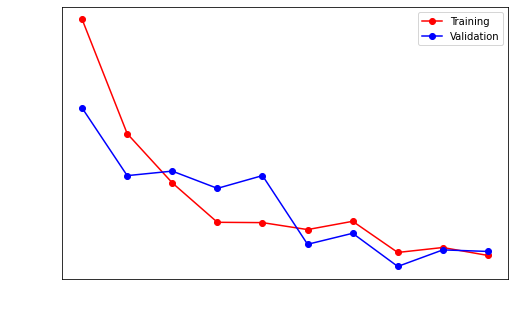

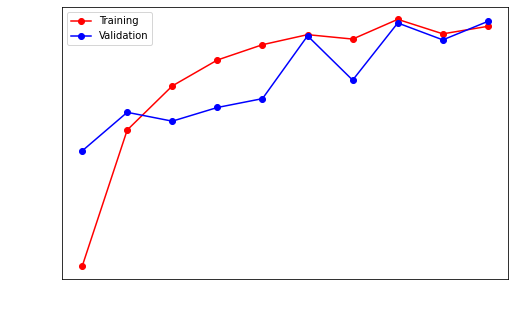

accuracy: 57.17%
Training dataset:
Found 18888 validated image filenames belonging to 3 classes.
Validation dataset:
Found 2099 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.0952 - accuracy: 0.3825
Epoch 00001: val_accuracy improved from -inf to 0.47063, saving model to /content/saved_models/model_2.h5
100/100 [==============================] - 41s 405ms/step - loss: 1.0952 - accuracy: 0.3825 - val_loss: 1.0428 - val_accuracy: 0.4706
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 1.0456 - accuracy: 0.4494
Epoch 00002: val_accuracy did not improve from 0.47063
100/100 [==============================] - 41s 407ms/step - loss: 1.0456 - accuracy: 0.4494 - val_loss: 1.0373 - val_accuracy: 0.4494
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 1.0144 - accuracy: 0.4897
Epoch 00

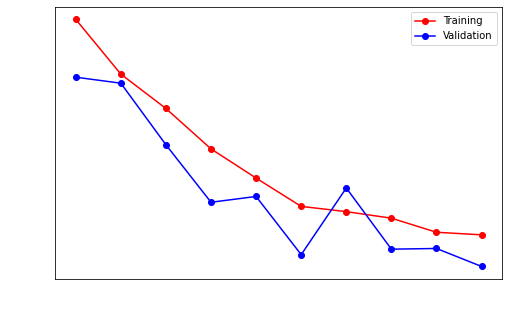

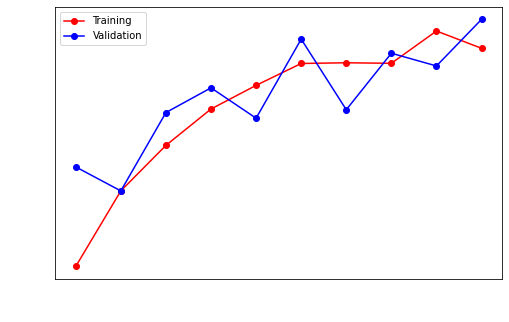

accuracy: 60.46%
Training dataset:
Found 18888 validated image filenames belonging to 3 classes.
Validation dataset:
Found 2099 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.0938 - accuracy: 0.3988
Epoch 00001: val_accuracy improved from -inf to 0.48562, saving model to /content/saved_models/model_3.h5
100/100 [==============================] - 41s 409ms/step - loss: 1.0938 - accuracy: 0.3988 - val_loss: 1.0091 - val_accuracy: 0.4856
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 1.0023 - accuracy: 0.5000
Epoch 00002: val_accuracy improved from 0.48562 to 0.51688, saving model to /content/saved_models/model_3.h5
100/100 [==============================] - 40s 400ms/step - loss: 1.0023 - accuracy: 0.5000 - val_loss: 0.9690 - val_accuracy: 0.5169
Epoch 3/10
100/100 [==============================

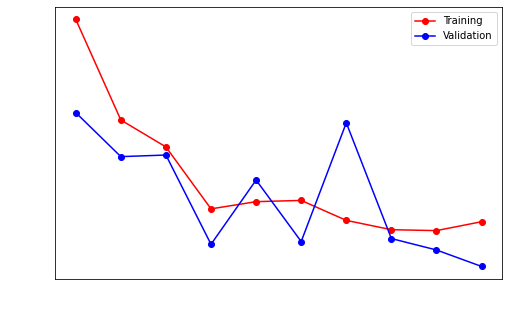

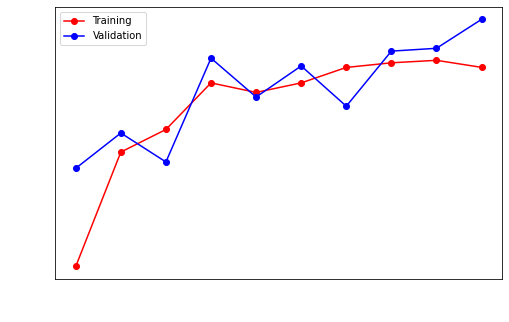

accuracy: 61.65%
Training dataset:
Found 18888 validated image filenames belonging to 3 classes.
Validation dataset:
Found 2099 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.0566 - accuracy: 0.4387
Epoch 00001: val_accuracy improved from -inf to 0.47688, saving model to /content/saved_models/model_4.h5
100/100 [==============================] - 40s 400ms/step - loss: 1.0566 - accuracy: 0.4387 - val_loss: 1.0117 - val_accuracy: 0.4769
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.9891 - accuracy: 0.5113
Epoch 00002: val_accuracy improved from 0.47688 to 0.54312, saving model to /content/saved_models/model_4.h5
100/100 [==============================] - 40s 400ms/step - loss: 0.9891 - accuracy: 0.5113 - val_loss: 0.9314 - val_accuracy: 0.5431
Epoch 3/10
100/100 [==============================

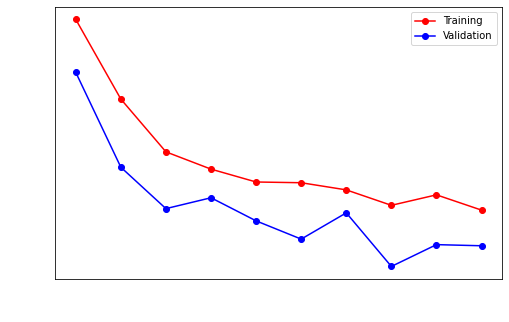

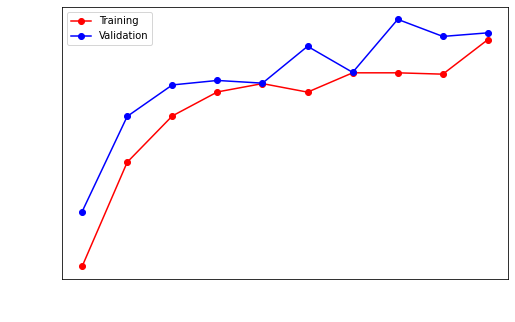

accuracy: 61.51%
Training dataset:
Found 18888 validated image filenames belonging to 3 classes.
Validation dataset:
Found 2099 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.0839 - accuracy: 0.4141
Epoch 00001: val_accuracy improved from -inf to 0.50250, saving model to /content/saved_models/model_5.h5
100/100 [==============================] - 41s 405ms/step - loss: 1.0839 - accuracy: 0.4141 - val_loss: 1.0156 - val_accuracy: 0.5025
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 1.0199 - accuracy: 0.4641
Epoch 00002: val_accuracy did not improve from 0.50250
100/100 [==============================] - 40s 405ms/step - loss: 1.0199 - accuracy: 0.4641 - val_loss: 0.9742 - val_accuracy: 0.4844
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 0.9736 - accuracy: 0.5088
Epoch 00

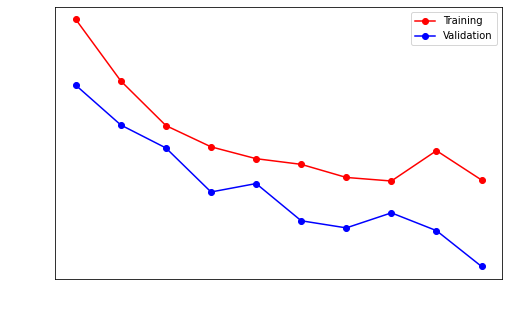

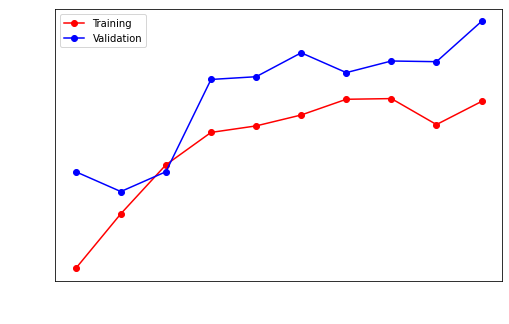

accuracy: 63.32%
Training dataset:
Found 18888 validated image filenames belonging to 3 classes.
Validation dataset:
Found 2099 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.0697 - accuracy: 0.4238
Epoch 00001: val_accuracy improved from -inf to 0.50187, saving model to /content/saved_models/model_6.h5
100/100 [==============================] - 41s 408ms/step - loss: 1.0697 - accuracy: 0.4238 - val_loss: 0.9831 - val_accuracy: 0.5019
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.9811 - accuracy: 0.5116
Epoch 00002: val_accuracy improved from 0.50187 to 0.53250, saving model to /content/saved_models/model_6.h5
100/100 [==============================] - 41s 408ms/step - loss: 0.9811 - accuracy: 0.5116 - val_loss: 0.9569 - val_accuracy: 0.5325
Epoch 3/10
100/100 [==============================

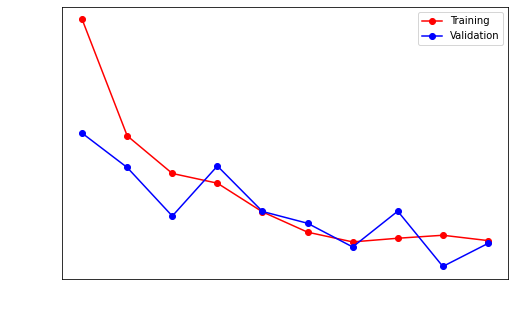

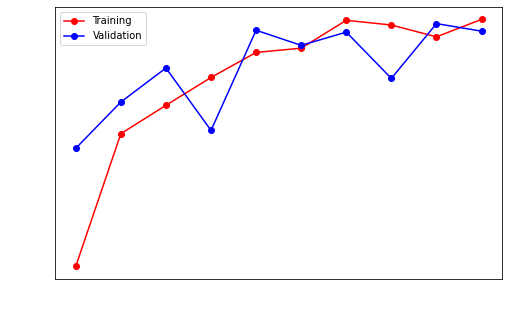

accuracy: 58.22%
Training dataset:
Found 18888 validated image filenames belonging to 3 classes.
Validation dataset:
Found 2099 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.0865 - accuracy: 0.3875
Epoch 00001: val_accuracy improved from -inf to 0.51000, saving model to /content/saved_models/model_7.h5
100/100 [==============================] - 41s 414ms/step - loss: 1.0865 - accuracy: 0.3875 - val_loss: 0.9903 - val_accuracy: 0.5100
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.9894 - accuracy: 0.5084
Epoch 00002: val_accuracy improved from 0.51000 to 0.55563, saving model to /content/saved_models/model_7.h5
100/100 [==============================] - 40s 404ms/step - loss: 0.9894 - accuracy: 0.5084 - val_loss: 0.9143 - val_accuracy: 0.5556
Epoch 3/10
100/100 [==============================

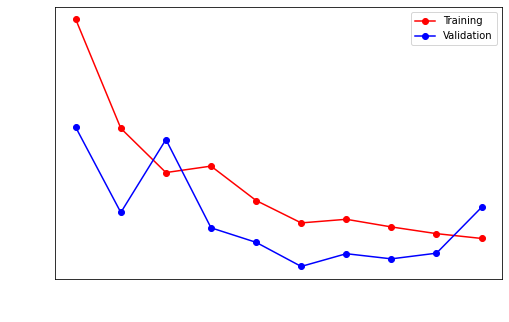

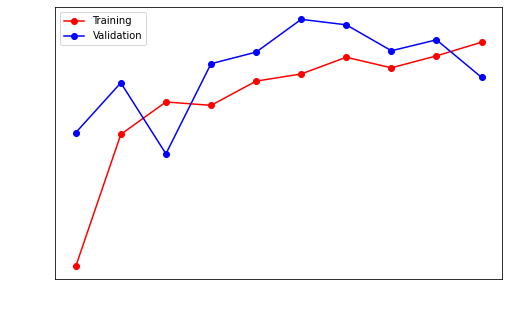

accuracy: 61.03%
Training dataset:
Found 18889 validated image filenames belonging to 3 classes.
Validation dataset:
Found 2098 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.0896 - accuracy: 0.3894
Epoch 00001: val_accuracy improved from -inf to 0.46000, saving model to /content/saved_models/model_8.h5
100/100 [==============================] - 41s 410ms/step - loss: 1.0896 - accuracy: 0.3894 - val_loss: 1.0401 - val_accuracy: 0.4600
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 1.0252 - accuracy: 0.4716
Epoch 00002: val_accuracy improved from 0.46000 to 0.50875, saving model to /content/saved_models/model_8.h5
100/100 [==============================] - 41s 414ms/step - loss: 1.0252 - accuracy: 0.4716 - val_loss: 0.9856 - val_accuracy: 0.5088
Epoch 3/10
100/100 [==============================

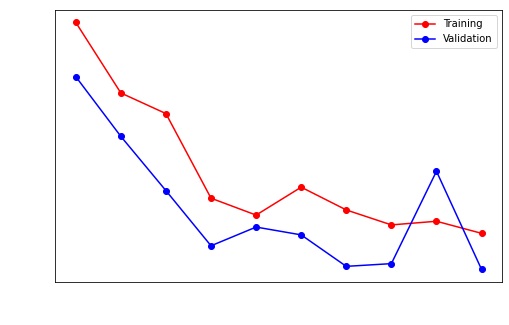

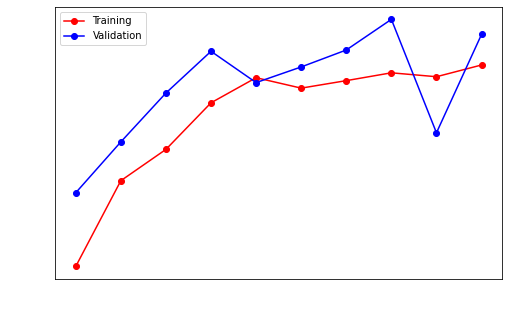

accuracy: 62.30%
Training dataset:
Found 18889 validated image filenames belonging to 3 classes.
Validation dataset:
Found 2098 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.0885 - accuracy: 0.3906
Epoch 00001: val_accuracy improved from -inf to 0.47063, saving model to /content/saved_models/model_9.h5
100/100 [==============================] - 41s 410ms/step - loss: 1.0885 - accuracy: 0.3906 - val_loss: 1.0277 - val_accuracy: 0.4706
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 1.0073 - accuracy: 0.4816
Epoch 00002: val_accuracy improved from 0.47063 to 0.53250, saving model to /content/saved_models/model_9.h5
100/100 [==============================] - 41s 408ms/step - loss: 1.0073 - accuracy: 0.4816 - val_loss: 0.9876 - val_accuracy: 0.5325
Epoch 3/10
100/100 [==============================

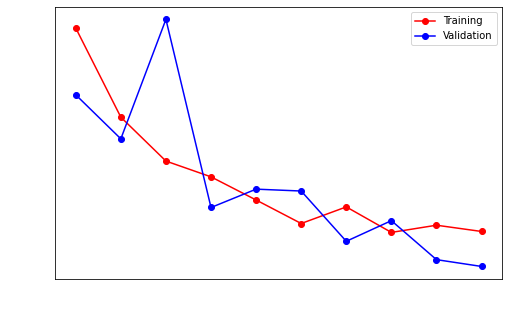

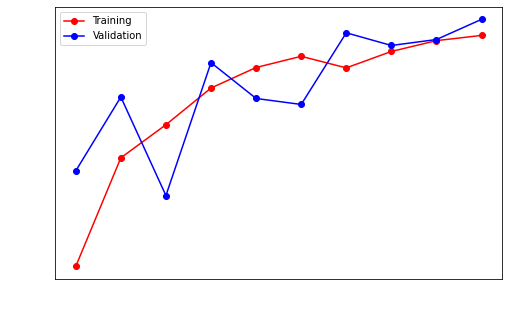

accuracy: 60.39%
Training dataset:
Found 18889 validated image filenames belonging to 3 classes.
Validation dataset:
Found 2098 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.0865 - accuracy: 0.3931
Epoch 00001: val_accuracy improved from -inf to 0.51812, saving model to /content/saved_models/model_10.h5
100/100 [==============================] - 41s 414ms/step - loss: 1.0865 - accuracy: 0.3931 - val_loss: 1.0218 - val_accuracy: 0.5181
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 1.0073 - accuracy: 0.4884
Epoch 00002: val_accuracy improved from 0.51812 to 0.55187, saving model to /content/saved_models/model_10.h5
100/100 [==============================] - 41s 408ms/step - loss: 1.0073 - accuracy: 0.4884 - val_loss: 0.9397 - val_accuracy: 0.5519
Epoch 3/10
100/100 [===========================

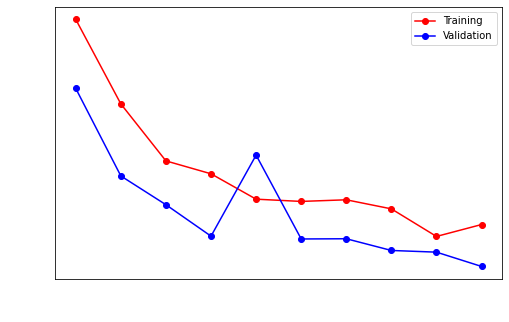

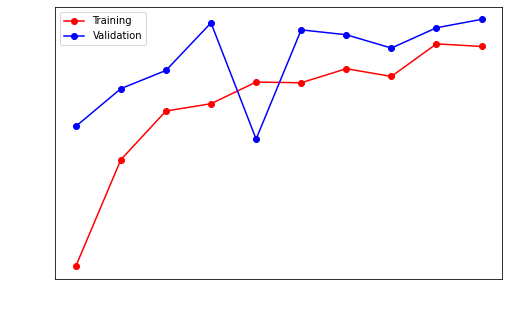

accuracy: 62.06%
60.81% (+/- 1.78%)


In [ ]:
from keras import layers
from keras import models

VALIDATION_ACCURACY = []

#save_dir = '/content/drive/My Drive/Deep_Learning/data/tarefa_4/saved_models/'
save_dir = '/content/saved_models/'
fold_var = 1

batch_size = 32
img_size = (64,64)

num_classes = 3
num_epochs = 10

for train_index, val_index in kf.split(np.zeros(n_samples),Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  print("Training dataset:")
  train_generator = train_datagen.flow_from_dataframe(
        dataframe= training_data,
        directory= image_dir,
        x_col="filename",
        y_col="category",
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=img_size)

  print("Validation dataset:")
  valid_generator = val_datagen.flow_from_dataframe(
        dataframe= validation_data,
        directory= image_dir,
        x_col="filename",
        y_col="category",
        seed=42,
        shuffle=True,
        class_mode="categorical",
        target_size=img_size)

  # CREATE NEW MODEL
  '''
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', 
  input_shape=img_size + (3,)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))
  '''

  # Build the model.
  model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=img_size + (3,)),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    Flatten(),
    Dense(num_classes, activation='softmax'),
  ])

  # Compile the model.
  model.compile(
    'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )
    
  # Create Callbacks save the best model
  checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var), 
              monitor='val_accuracy', verbose=1, 
              save_best_only=True, mode='max')
  callbacks_list = [checkpoint]
  # This saves the best model
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_var} ...')

  # Fit the Model
  '''
  step_size_train=train_generator.n//train_generator.batch_size
  step_size_valid=valid_generator.n//valid_generator.batch_size

  history = model.fit_generator(generator=train_generator,
                      steps_per_epoch=step_size_train,
                      validation_data=valid_generator,
                      validation_steps=step_size_valid,
                      epochs=1
  )
  '''

  history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,  
  epochs=10,
  validation_data=valid_generator,
  validation_steps=50,
  callbacks=callbacks_list)

  #PLOT HISTORY
  la_plots(history)

  # LOAD BEST MODEL to evaluate the performance of the model
  model.load_weights(save_dir+get_model_name(fold_var))
  '''
  results = model.evaluate(valid_generator)
  results = dict(zip(model.metrics_names,results))
  '''
  scores = model.evaluate(valid_generator, verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

  VALIDATION_ACCURACY.append(scores[1] * 100)

  tf.keras.backend.clear_session()

  fold_var += 1

print("%.2f%% (+/- %.2f%%)" % (np.mean(VALIDATION_ACCURACY), np.std(VALIDATION_ACCURACY)))